### Create a dir where figures are saved

In [1]:
# Make dir for figures

import os
outdir = './figs/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

## Loading pre-cleaned data

In [2]:
import pandas as pd
import numpy as np


data = pd.read_csv('./data/cleaned/project_data.csv', index_col='SEQN')

data.columns

Index(['RXDRSC1', 'RIDAGEYR', 'BPQ020', 'BPD035', 'BPQ040A', 'BPQ050A',
       'BPQ056', 'BPQ059', 'BPQ080', 'BPQ070', 'BPQ090D', 'HSD010', 'DIQ010',
       'DLQ050', 'HUQ010', 'HUQ051', 'IMQ090', 'INQ030', 'INQ080', 'MCQ160A',
       'MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D', 'MCQ370C', 'OCD150',
       'PFQ051', 'PFQ054', 'PFQ090', 'PAQ650', 'RHQ031', 'RHD280', 'RXQ510',
       'SMD055', 'SMQ856'],
      dtype='object')

#### Removing participants with missing value age

In [3]:
data = data[data.RIDAGEYR.notnull()]
# data = data[data.RIDAGEYR != 0]

data.shape

(10137, 35)

#### Replacing BPQ020 missing values

##### BPQ020 - Ever told you had high blood pressure

(Have you/Has SP) ever been told by a doctor or other health professional that (you/s/he) had hypertension, also called high blood pressure?

<table class="values">
            <thead>
              <tr>
                <th scope="column" class="values">Code or Value</th>
                <th scope="column" class="values">Value Description</th>
                <th scope="column" class="values">Count</th>
                <th scope="column" class="values">Cumulative</th>
                <th scope="column" class="values">Skip to Item</th>
              </tr>
            </thead>
            <tbody>
              <tr>
                <td scope="row" class="values">1</td>
                <td class="values">Yes</td>
                <td class="values" align="right">2174</td>
                <td class="values" align="right">2174</td>
                <td class="values">
                </td>
              </tr>
              <tr>
                <td scope="row" class="values">2</td>
                <td class="values">No</td>
                <td class="values" align="right">4285</td>
                <td class="values" align="right">6459</td>
                <td class="values">BPQ056  </td>
              </tr>
              <tr>
                <td scope="row" class="values">7</td>
                <td class="values">Refused</td>
                <td class="values" align="right">0</td>
                <td class="values" align="right">6459</td>
                <td class="values">BPQ056  </td>
              </tr>
              <tr>
                <td scope="row" class="values">9</td>
                <td class="values">Don't know</td>
                <td class="values" align="right">5</td>
                <td class="values" align="right">6464</td>
                <td class="values">BPQ056  </td>
              </tr>
              <tr>
                <td scope="row" class="values">.</td>
                <td class="values">Missing</td>
                <td class="values" align="right">0</td>
                <td class="values" align="right">6464</td>
                <td class="values">
                </td>
              </tr>
            </tbody>
          </table>

In [4]:
data[['BPQ020']] = data[['BPQ020']].fillna(value=2)
data.head()

,RXDRSC1,RIDAGEYR,BPQ020,BPD035,BPQ040A,BPQ050A,BPQ056,BPQ059,BPQ080,BPQ070,...,OCD150,PFQ051,PFQ054,PFQ090,PAQ650,RHQ031,RHD280,RXQ510,SMD055,SMQ856
SEQN,,,,,,,,,,,,,,,,,,,,,
73557,0.0,69.0,1.0,62.0,1.0,2.0,2.0,2.0,1.0,1.0,...,4.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,66.0,2.0
73558,0.0,54.0,1.0,53.0,2.0,NaN,1.0,2.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,1.0
73559,1.0,72.0,1.0,40.0,1.0,1.0,2.0,2.0,1.0,1.0,...,4.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,26.0,2.0
73560,0.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,1.0,73.0,1.0,55.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,2.0


### Correlation 

In [5]:
corr = data.corr()
corr

,RXDRSC1,RIDAGEYR,BPQ020,BPD035,BPQ040A,BPQ050A,BPQ056,BPQ059,BPQ080,BPQ070,...,OCD150,PFQ051,PFQ054,PFQ090,PAQ650,RHQ031,RHD280,RXQ510,SMD055,SMQ856
RXDRSC1,1.000000,0.548234,-0.764652,0.258779,-0.541644,-0.659324,-0.388907,-0.459707,-0.221391,-0.220526,...,0.233824,-0.228599,-0.229541,-0.241789,0.212924,0.455096,-0.256650,-0.287994,0.296148,0.237187
RIDAGEYR,0.548234,1.000000,-0.573809,0.731509,-0.367382,-0.212364,-0.308514,-0.287059,-0.249293,-0.212413,...,0.265806,-0.245380,-0.302580,-0.321320,0.369479,0.770754,-0.344301,-0.297186,0.566025,0.334164
BPQ020,-0.764652,-0.573809,1.000000,NaN,NaN,NaN,0.372050,0.467402,0.193353,0.172147,...,-0.210165,0.218799,0.231657,0.231135,-0.218103,-0.435377,0.251060,0.235579,-0.293121,-0.221936
BPD035,0.258779,0.731509,NaN,1.000000,-0.268173,-0.114092,-0.119344,-0.045514,-0.088076,-0.109748,...,0.293402,-0.088874,-0.129526,-0.153580,0.165588,0.524250,-0.213262,-0.083011,0.310689,0.277148
BPQ040A,-0.541644,-0.367382,NaN,-0.268173,1.000000,NaN,0.212280,0.200222,0.096848,0.136918,...,-0.135945,0.105717,0.071975,0.071256,-0.124524,-0.293751,0.108394,0.099858,-0.085655,-0.136316
BPQ050A,-0.659324,-0.212364,NaN,-0.114092,NaN,1.000000,0.105112,0.064371,0.069305,0.177920,...,-0.107070,0.032577,0.065440,0.085391,-0.064538,-0.176466,0.068943,0.104193,-0.044890,-0.098860
BPQ056,-0.388907,-0.308514,0.372050,-0.119344,0.212280,0.105112,1.000000,0.487027,0.123898,0.140420,...,-0.121445,0.129583,0.124580,0.135180,-0.105330,-0.269522,0.184066,0.159995,-0.121126,-0.127133
BPQ059,-0.459707,-0.287059,0.467402,-0.045514,0.200222,0.064371,0.487027,1.000000,0.136410,0.138624,...,-0.128473,0.152600,0.140557,0.152684,-0.096715,-0.240671,0.173318,0.175067,-0.141457,-0.133366
BPQ080,-0.221391,-0.249293,0.193353,-0.088076,0.096848,0.069305,0.123898,0.136410,1.000000,0.105232,...,-0.051647,0.063776,0.038707,0.041334,-0.081097,-0.246036,0.180322,0.157622,-0.058985,-0.064363
BPQ070,-0.220526,-0.212413,0.172147,-0.109748,0.136918,0.177920,0.140420,0.138624,0.105232,1.000000,...,-0.093789,0.039977,0.070983,0.078328,-0.045867,-0.178441,0.103409,0.131976,-0.071766,-0.078946


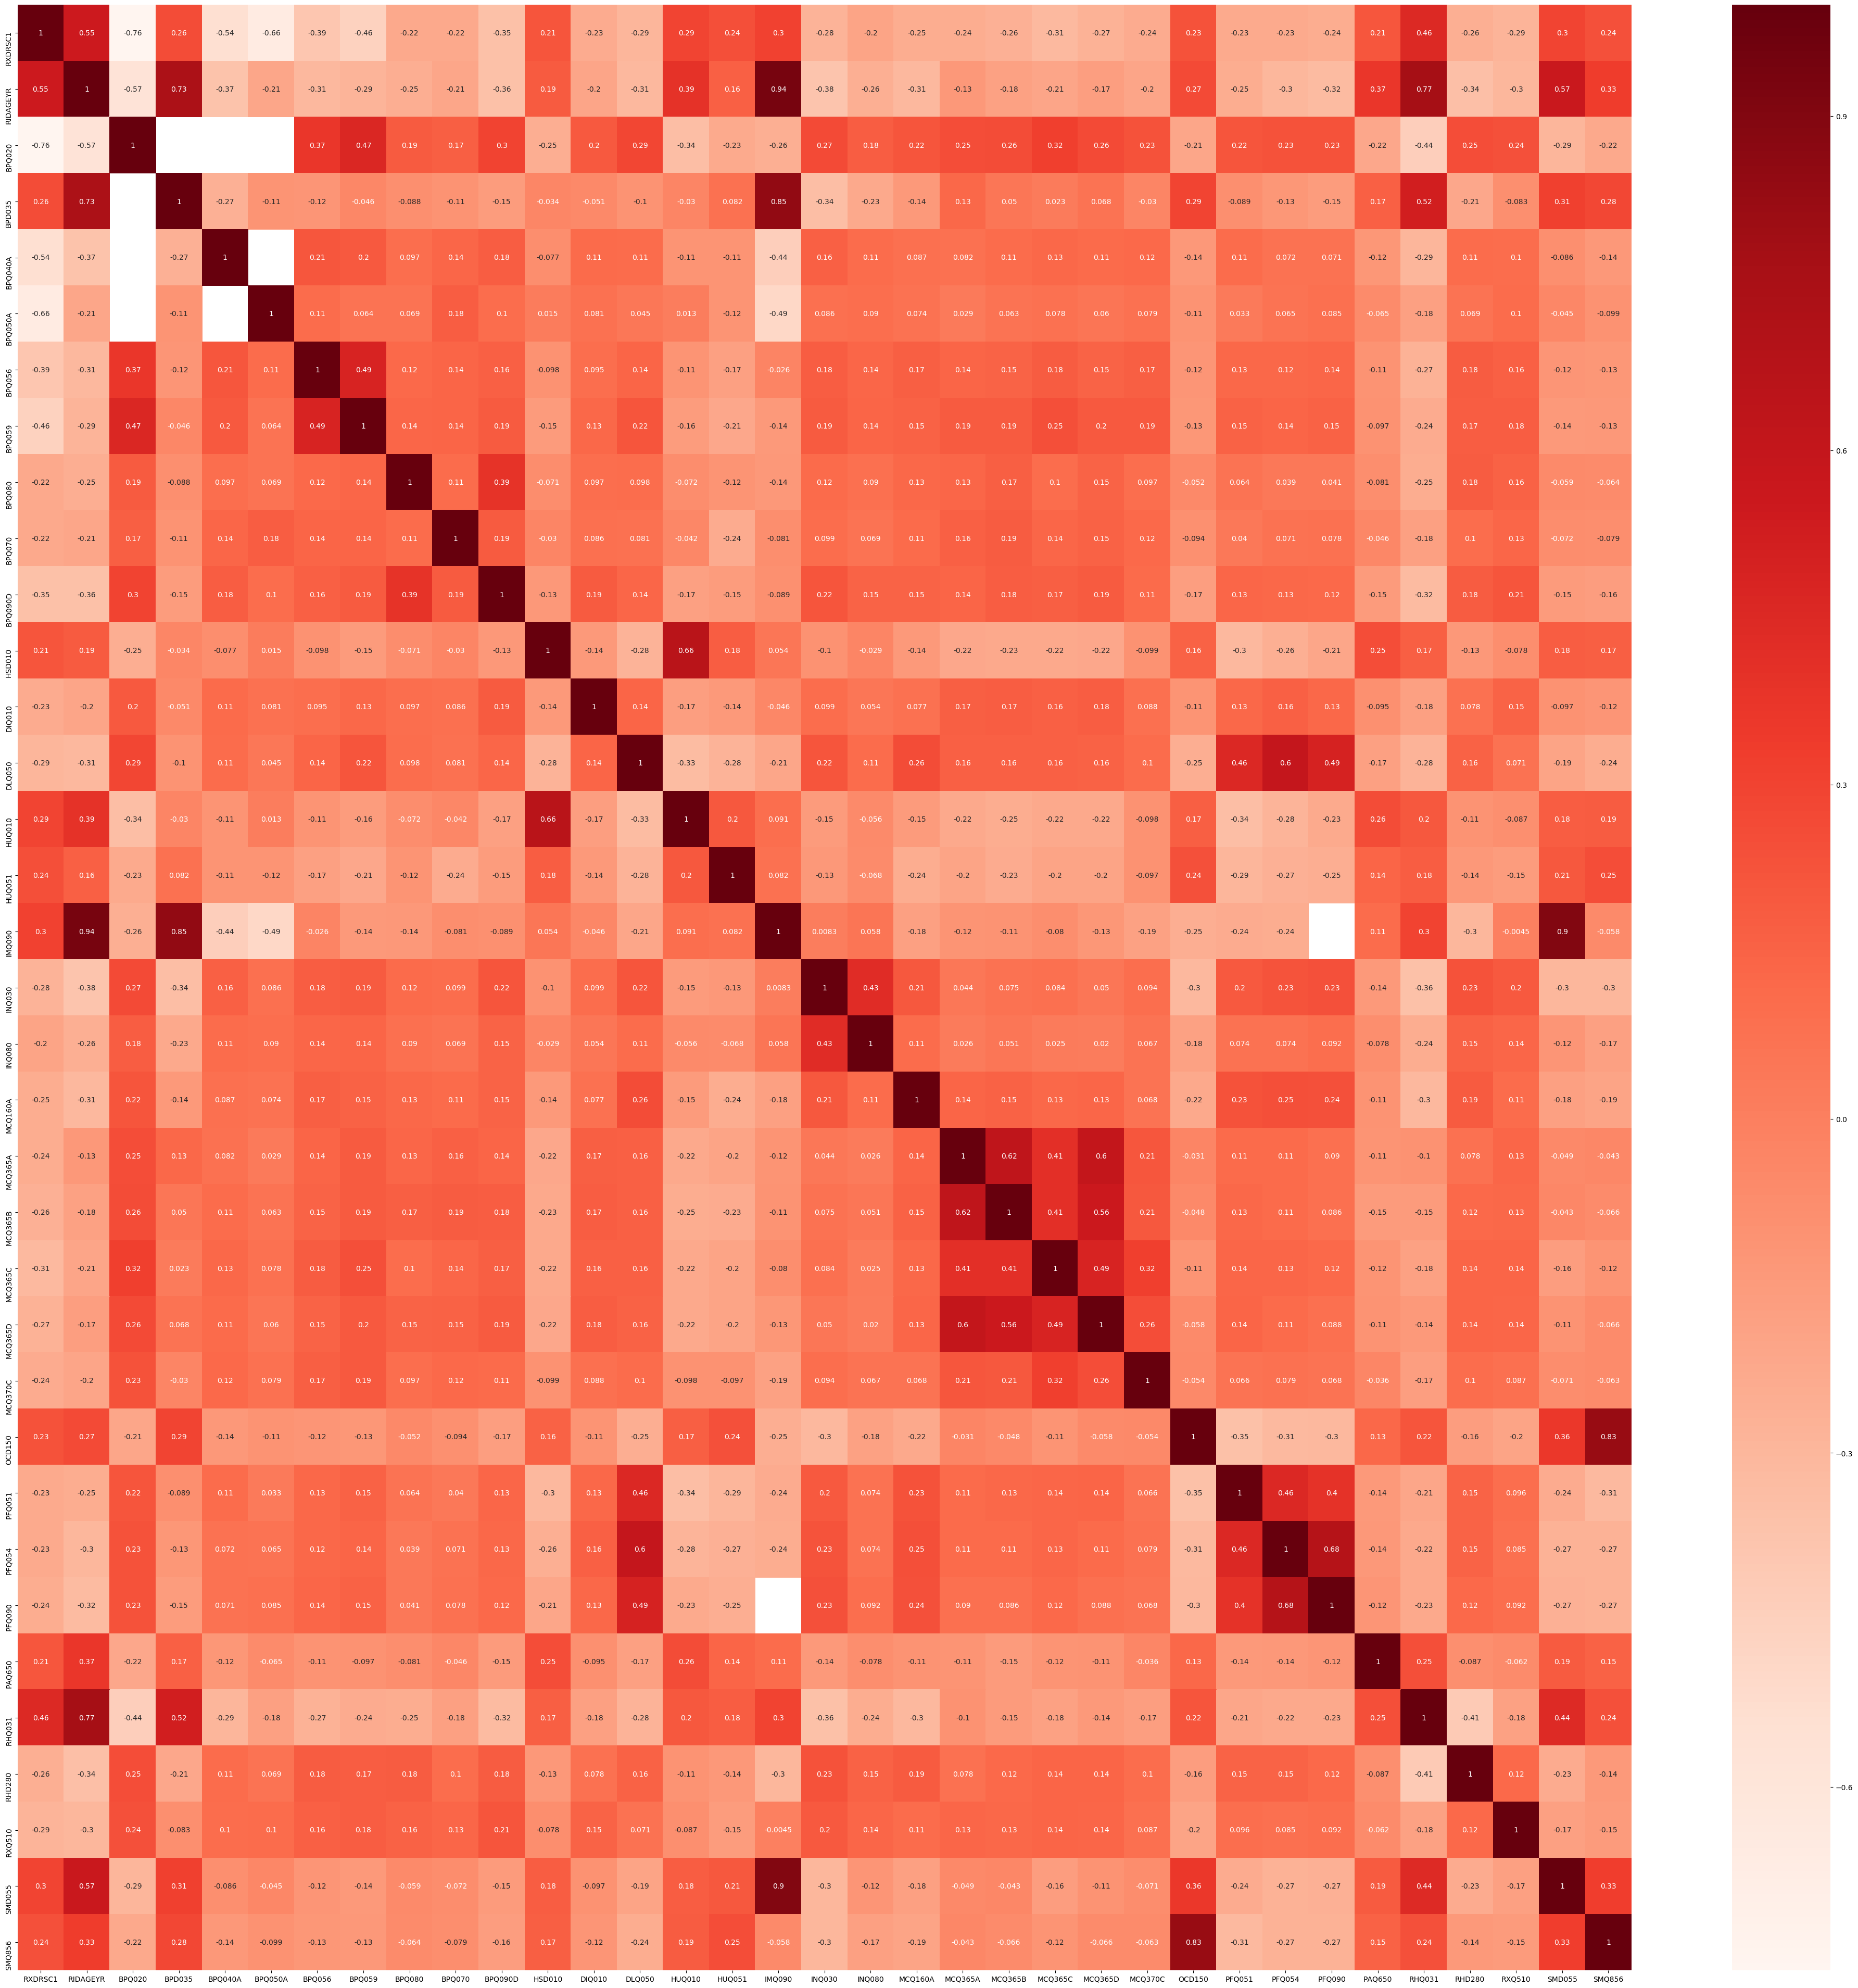

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.figure(figsize=(50, 50), dpi=100)
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

     

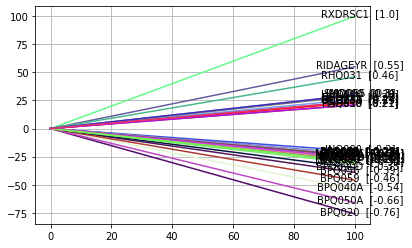

In [7]:
corr = np.round(corr, decimals=2)

fig, ax = plt.subplots()
idx = 0
for corr_coeff in corr['RXDRSC1']:
    x = np.linspace(0, 100, 150)
    y = corr_coeff*x
    ax.plot(x, y, color=np.random.random(3))
    ax.grid()
    ax.annotate(s=corr['RXDRSC1'].index[idx]+'  ['+str(corr_coeff)+']', xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points',  ha='center')
    idx +=1
    
    
fig.savefig(outdir+'linear_corr_with_hypertension.png', bbox_inches = 'tight', dpi=300)



<Figure size 3600x7200 with 0 Axes>

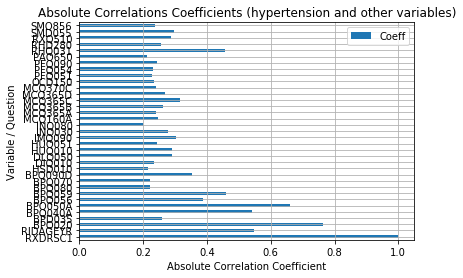

In [8]:

plt.figure(figsize=(50, 100))  

ax = pd.DataFrame(abs(data.corrwith(abs(data.RXDRSC1)))).plot.barh(width=0.5)
ax.grid(zorder=0)

plt.title('Absolute Correlations Coefficients (hypertension and other variables)')
plt.xlabel('Absolute Correlation Coefficient', fontsize=10)
plt.ylabel('Variable / Question', fontsize=10)
plt.legend(['Coeff'])

    
plt.savefig(outdir+'corr_with_hypertension.png', bbox_inches = 'tight', dpi=300)



## Exploring variables and correlations

Correlation coefficient: 0.85


46

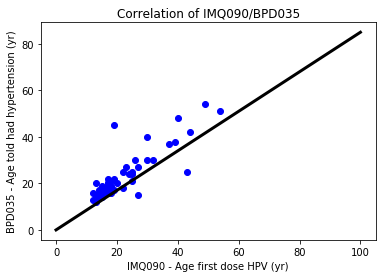

In [9]:
df_bivar= data[['BPD035', 'IMQ090']]
df_bivar = df_bivar.dropna()

x = np.linspace(0, 100, len(df_bivar))
plt.scatter(df_bivar['IMQ090'], df_bivar['BPD035'],  color='blue')

y = corr['BPD035']['IMQ090']*x
plt.plot(x, y, color='black', linewidth=3)
plt.title('Correlation of IMQ090/BPD035')
plt.xlabel('IMQ090 - Age first dose HPV (yr)', fontsize=10)
plt.ylabel('BPD035 - Age told had hypertension (yr)', fontsize=10)

    
plt.savefig(outdir+'corr_IMQ090_BPD035.png', bbox_inches = 'tight', dpi=200)
  
print('Correlation coefficient: '+str(corr['BPD035']['IMQ090']))
len(df_bivar)

# This is a good correlation coefficient, however the number of samples N is very small... 
# However there exist some research about the link between HPV and hypertension!

Correlation coefficient: 0.31


564

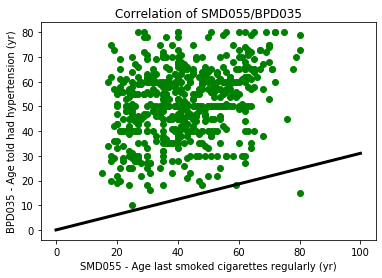

In [10]:
df_bivar= data[['BPD035', 'SMD055']]
df_bivar = df_bivar.dropna()

x = np.linspace(0, 100, len(df_bivar))
plt.scatter(df_bivar['SMD055'], df_bivar['BPD035'],  color='green')

y = corr['BPD035']['SMD055']*x
plt.plot(x, y, color='black', linewidth=3)
plt.title('Correlation of SMD055/BPD035')
plt.xlabel('SMD055 - Age last smoked cigarettes regularly (yr)', fontsize=10)
plt.ylabel('BPD035 - Age told had hypertension (yr)', fontsize=10)

    
plt.savefig(outdir+'corr_SMD055_BPD035.png', bbox_inches = 'tight', dpi=200)
  
print('Correlation coefficient: '+str(corr['BPD035']['SMD055']))
len(df_bivar)

# The data here may not illustrate well the correlation...
# The sample size is larger, but the correlation seem to be weak.

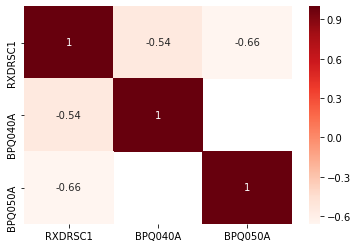

In [11]:
df_bp_subset = data[['RXDRSC1', 'BPQ040A', 'BPQ050A']]
bp_subset_corr = df_bp_subset.corr()

plt.figure()
sns.heatmap(bp_subset_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
asf = data[['BPQ040A', 'BPQ050A']]
asf = asf.dropna()
asf.head(10)

,BPQ040A,BPQ050A
SEQN,,
73557,1.0,2.0
73559,1.0,1.0
73561,1.0,1.0
73562,1.0,1.0
73564,1.0,2.0
73571,1.0,1.0
73600,1.0,2.0
73613,1.0,1.0
73615,1.0,1.0


### % of missing values per column

In [13]:
data.isnull().sum(axis=0)/data.shape[0]

RXDRSC1     0.000000
RIDAGEYR    0.000000
BPQ020      0.000000
BPD035      0.792345
BPQ040A     0.788004
BPQ050A     0.823419
BPQ056      0.366085
BPQ059      0.366085
BPQ080      0.366085
BPQ070      0.547697
BPQ090D     0.547697
HSD010      0.365197
DIQ010      0.040051
DLQ050      0.137615
HUQ010      0.000000
HUQ051      0.000986
IMQ090      0.921476
INQ030      0.012134
INQ080      0.012134
MCQ160A     0.434645
MCQ365A     0.366085
MCQ365B     0.366085
MCQ365C     0.366085
MCQ365D     0.366085
MCQ370C     0.366085
OCD150      0.366578
PFQ051      0.434645
PFQ054      0.434645
PFQ090      0.434645
PAQ650      0.298708
RHQ031      0.680182
RHD280      0.742922
RXQ510      0.627405
SMD055      0.883200
SMQ856      0.400710
dtype: float64

## Classification
### Q: Can we identify participants with hypertension based on some selected variable?

In [14]:
df = data[['RXDRSC1', 'BPQ080', 'PAQ650', 'HSD010', 'INQ030', 'INQ080']]
df = df.dropna()

target_column = 'RXDRSC1'

df.shape

(5692, 6)

In [15]:
target = df[target_column]
data_ML = df.loc[:, df.columns != target_column]

In [16]:
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data_ML,target, test_size = 0.30, random_state = 10)



In [17]:
model_comparison = []
model_names = []
mean_comparison = []

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier().fit(data_train, target_train)
pred = model.predict(data_test)

print(accuracy_score(target_test, pred, normalize = True))

results = cross_val_score(model, data_train, target_train, scoring='accuracy')
model_comparison.append(results)
model_names.append("DecisionTree")
mean_comparison.append(results.mean())
output_message = "%s| Mean=%f STD=%f" % ("model_name", results.mean(), results.std())
print(output_message)

0.7804449648711944
model_name| Mean=0.800703 STD=0.000864


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB().fit(data_train, target_train)
pred = model.predict(data_test)

print("Naive-Bayes accuracy : ", accuracy_score(target_test, pred, normalize = True))

results = cross_val_score(model, data_train, target_train, scoring='accuracy')
model_comparison.append(results)
model_names.append("NaiveBayes")
mean_comparison.append(results.mean())
output_message = "%s| Mean=%f STD=%f" % ("model_name", results.mean(), results.std())
print(output_message)

Naive-Bayes accuracy :  0.772248243559719
model_name| Mean=0.788655 STD=0.007101


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC(random_state=0).fit(data_train, target_train)
pred = model.predict(data_test)

print("LinearSVC accuracy : ", accuracy_score(target_test, pred, normalize = True))

results = cross_val_score(model, data_train, target_train, scoring='accuracy')
model_comparison.append(results)
model_names.append("Linear SVC")
mean_comparison.append(results.mean())
output_message = "%s| Mean=%f STD=%f" % ("model_name", results.mean(), results.std())
print(output_message)

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC accuracy :  0.7769320843091335
model_name| Mean=0.791664 STD=0.003882


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=3).fit(data_train, target_train)
pred = model.predict(data_test)

print ("KNeighbors accuracy score : ", accuracy_score(target_test, pred))

results = cross_val_score(model, data_train, target_train, scoring='accuracy')
model_comparison.append(results)
model_names.append("KNeighbors")
mean_comparison.append(results.mean())
output_message = "%s| Mean=%f STD=%f" % ("model_name", results.mean(), results.std())
print(output_message)

KNeighbors accuracy score :  0.7558548009367682


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


model_name| Mean=0.719159 STD=0.052266


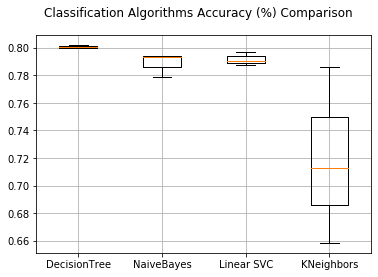

In [22]:
fig = plt.figure()
fig.suptitle('Classification Algorithms Accuracy (%) Comparison')

ax = fig.add_subplot(111)
plt.boxplot(model_comparison)
ax.set_xticklabels(model_names)

ax.grid()
# plt.show()

fig.savefig(outdir+'classification_algorithms_comparison.png', bbox_inches = 'tight', dpi=200)



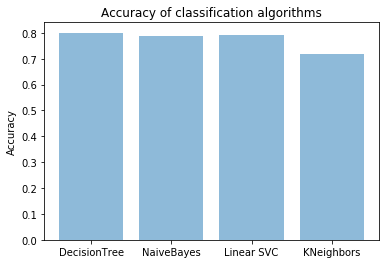

In [23]:
y_pos = np.arange(len(mean_comparison))

plt.bar(y_pos, mean_comparison, align='center', alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Accuracy')
plt.title('Accuracy of classification algorithms')

plt.savefig(outdir+'accuracy_classification_algorithms_barchart.png', bbox_inches = 'tight', dpi=200)



In [24]:
mean_arr = np.round(mean_comparison, decimals=4)

idx = 0 
for m_name in model_names:
    print(m_name + ' accuracy: ')
    print('   '+str(mean_arr[idx]))
    idx += 1

DecisionTree accuracy: 
   0.8007
NaiveBayes accuracy: 
   0.7887
Linear SVC accuracy: 
   0.7917
KNeighbors accuracy: 
   0.7192


## Regression

### Q: Can we predict the age of diagnosis of hypertension?

In [25]:
df2 = data[['RXDRSC1', 'BPD035', 'RIDAGEYR', 'BPQ020', 'SMD055', 'HUQ010']]
df2 = df2.dropna()

target_column2 = 'BPD035'

In [26]:
target_2 = df2[target_column2]
data_ML_2 = df2.loc[:, df2.columns != target_column2]

In [27]:
from sklearn.model_selection import train_test_split

#split data set into train and test sets
data_train_2, data_test_2, target_train_2, target_test_2 = train_test_split(data_ML_2,target_2, test_size = 0.30, random_state = 10)


In [28]:
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(data_train_2, target_train_2)
pred = model.predict(data_test_2)

mse = mean_squared_error(target_test_2, pred)
print("LinearRegression")
print("Mean Squared Error: "+ str(mse))
print("Root Mean Squared Error: "+ str(sqrt(mse)))

LinearRegression
Mean Squared Error: 143.28934352822856
Root Mean Squared Error: 11.970352690218803


In [29]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

model = LassoCV(max_iter = 10000, normalize = True).fit(data_train_2, target_train_2)
pred = model.predict(data_test_2)

mse = mean_squared_error(target_test_2, pred)
print("LassoCV")
print("Mean Squared Error: "+ str(mse))
print("Root Mean Squared Error: "+ str(sqrt(mse)))


LassoCV
Mean Squared Error: 143.62685524369564
Root Mean Squared Error: 11.984442216628008


/Users/macbookpro/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [30]:
df_reg = pd.DataFrame({'Actual': target_test_2, 'Predicted': pred})  
df_reg.head(15)


,Actual,Predicted
SEQN,,
80601,71.0,56.734433
78074,51.0,43.331944
81709,80.0,61.901351
78443,50.0,49.403016
74734,56.0,46.005869
77976,65.0,57.951873
78515,80.0,63.227164
74570,53.0,53.218088
77979,66.0,55.575117


### Conclusion and Implications

For such a precise study question (hypertension), it is difficult to use a National Health Survey dataset which contains a lot of missing data, inconsistent data, too many variables, etc. Much more data cleaning would have been required in order to select features adequately. 

It would have been preferrable to use a dataset that is really specific to hypertension.

It seems that the National Health Surveys purpose is to reflect the population's current health status, habits, etc. The conclusions from this project are too imprecise to mirror the current epidemiological studies conclusions. 